In [1]:
# importing the necessary libraries
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Loading the dataset
diabetes_data = pd.read_csv('diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

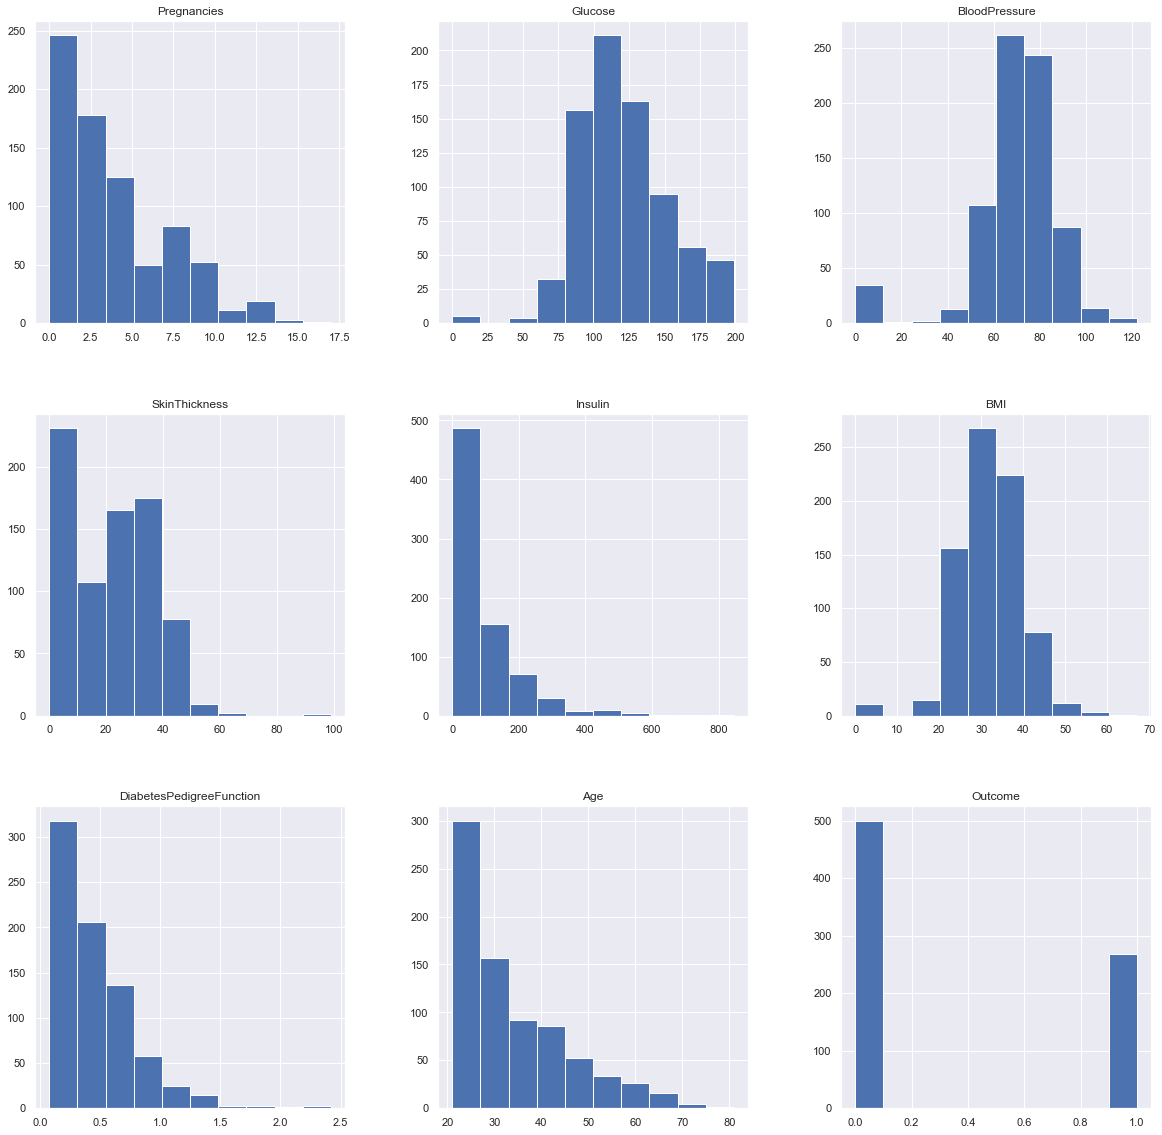

In [4]:
diabetes_data.hist(figsize = (20,20))

In [5]:
diabetes_data_copy = diabetes_data.copy(deep = True) # creating the copy of the dataset
# replacing the 0 values with Nan
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

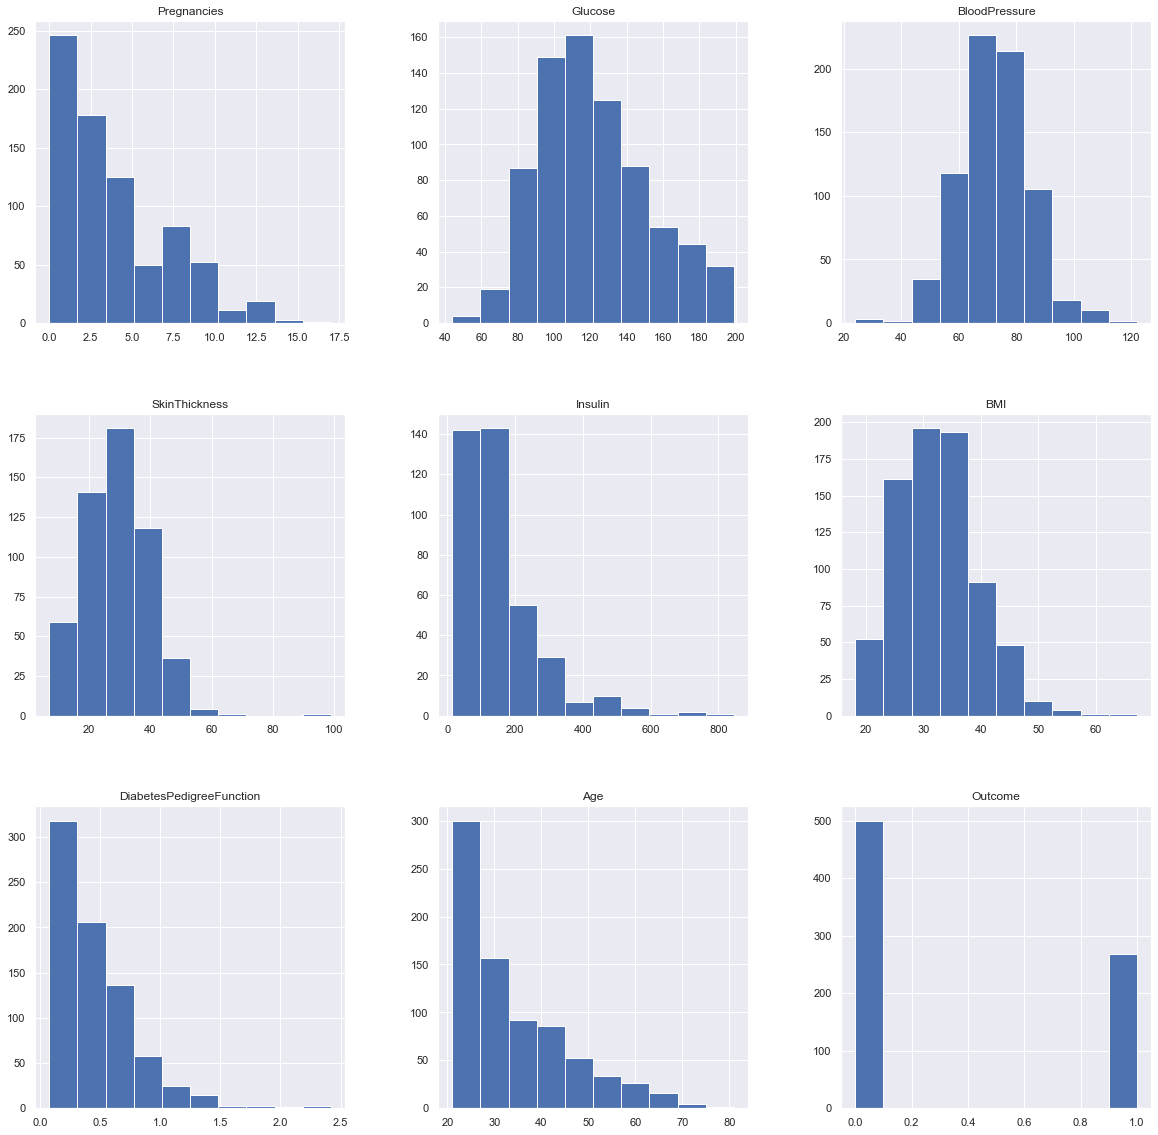

In [6]:
diabetes_data_copy.hist(figsize = (20,20))

In [7]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy.isna().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [11]:
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)
diabetes_data_copy.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df=diabetes_data_copy.drop(['Outcome'],axis=1)
df.head()
df_outcome=diabetes_data_copy.Outcome
df_outcome.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [13]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.532719
BloodPressure               0.137305
SkinThickness               0.837608
Insulin                     3.380019
BMI                         0.599233
DiabetesPedigreeFunction    1.919911
Age                         1.129597
dtype: float64

In [14]:
#df_in=np.log(df)
#df_in.describe()

In [15]:
#df['Insulin']=df_in
#df.head()

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

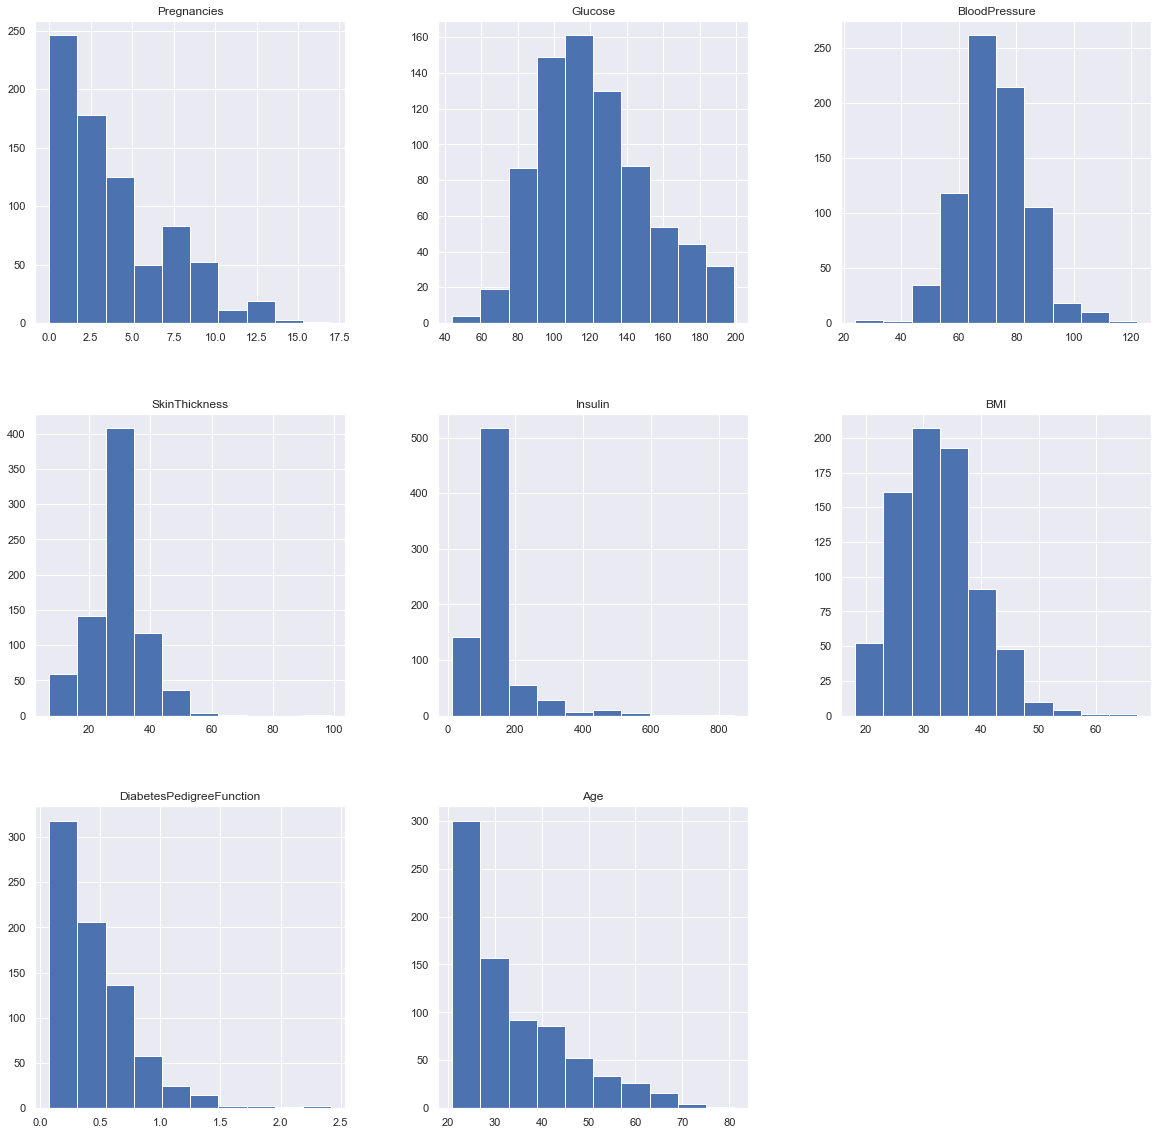

In [16]:
df.hist(figsize = (20,20))

In [17]:
diabetes_data_copy.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
#Import library
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_X = sc_X.fit_transform(df)
#Convert to table format - StandardScaler 
sc_X = pd.DataFrame(data=sc_X, columns=df.columns)
sc_X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.150354,0.455573,0.064737,-0.908682,2.532136
764,-0.547919,0.010298,-0.198965,-0.239949,-0.181541,0.632365,-0.398282,-0.531023
765,0.342981,-0.022579,-0.033518,-0.695245,-0.332132,-0.910418,-0.685193,-0.275760
766,-0.844885,0.141808,-1.026200,-0.012301,-0.181541,-0.342790,-0.371101,1.170732


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

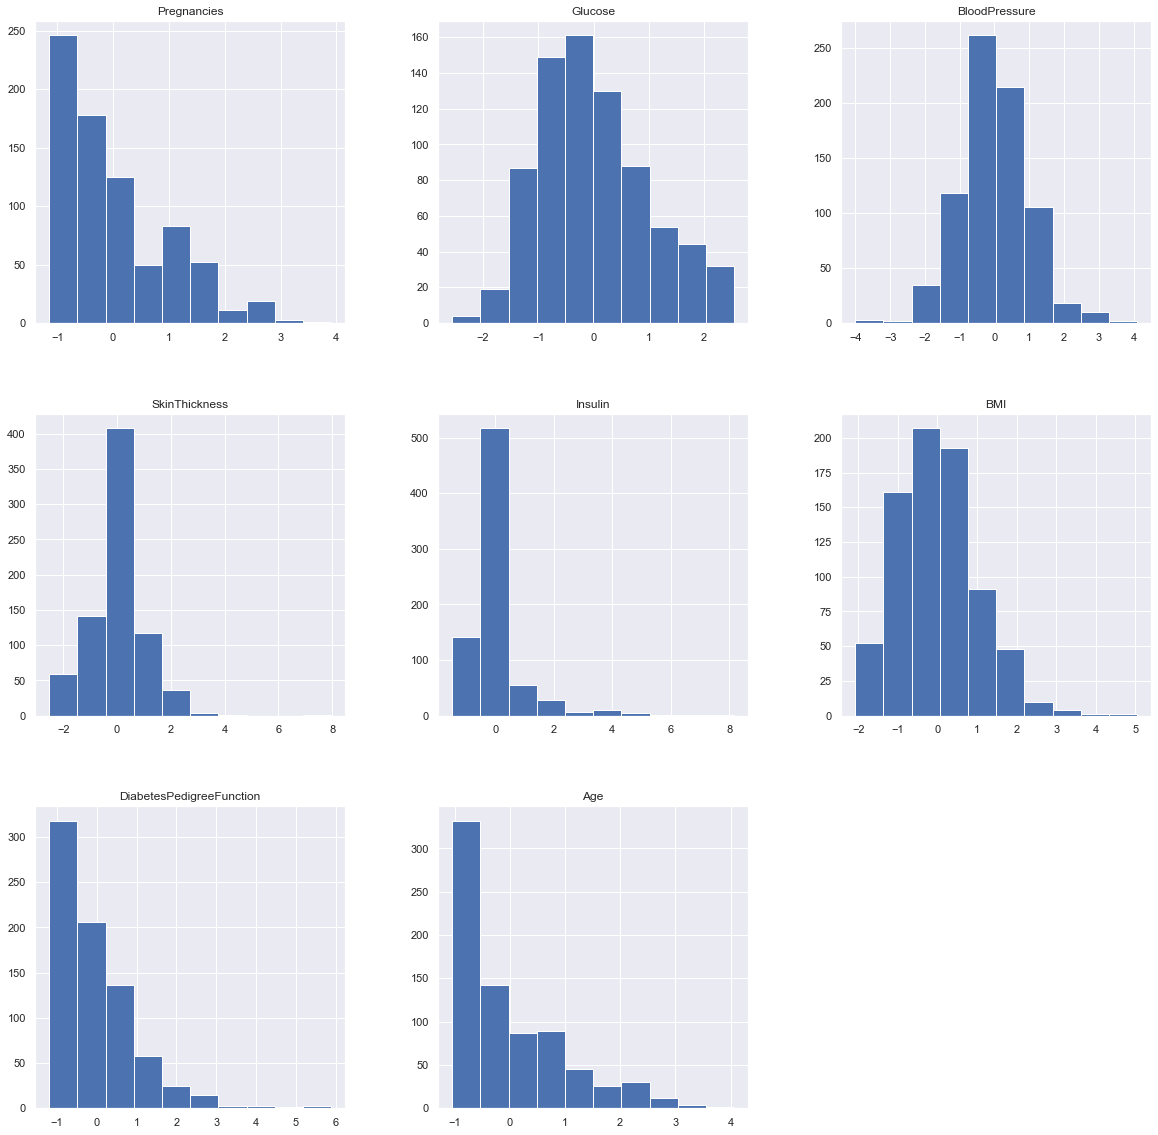

In [19]:
sc_X.hist(figsize = (20,20))

<AxesSubplot:xlabel='SkinThickness'>

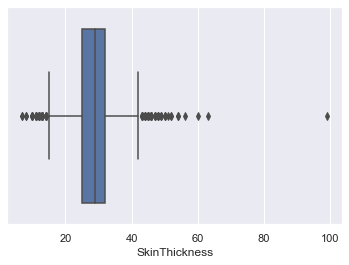

In [20]:
#sns.boxplot(x=diabetes_data_copy['BloodPressure'])
sns.boxplot(x=diabetes_data_copy['SkinThickness'])

In [21]:
diabetes_data_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [22]:
df_outcome.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [23]:
df.shape

(768, 8)

In [24]:
from scipy import stats

In [25]:
z = np.abs(stats.zscore(df))
print(z)

[[0.63994726 0.86510807 0.03351824 ... 0.16661938 0.46849198 1.4259954 ]
 [0.84488505 1.20616153 0.52985903 ... 0.85219976 0.36506078 0.19067191]
 [1.23388019 2.0158134  0.69530596 ... 1.33250021 0.60439732 0.10558415]
 ...
 [0.3429808  0.0225789  0.03351824 ... 0.910418   0.68519336 0.27575966]
 [0.84488505 0.14180757 1.02619983 ... 0.34279019 0.37110101 1.17073215]
 [0.84488505 0.94314317 0.19896517 ... 0.29912651 0.47378505 0.87137393]]


In [26]:
diabetes_df=df[(z < 3).all(axis=1)]

In [27]:
Q1 = df.quantile(0.10)
Q3 = df.quantile(0.90)
IQR = Q3 - Q1

In [28]:
diabetes_data_copy = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
diabetes_data_copy.shape

(747, 8)

In [29]:
diabetes_df.shape

(718, 8)

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

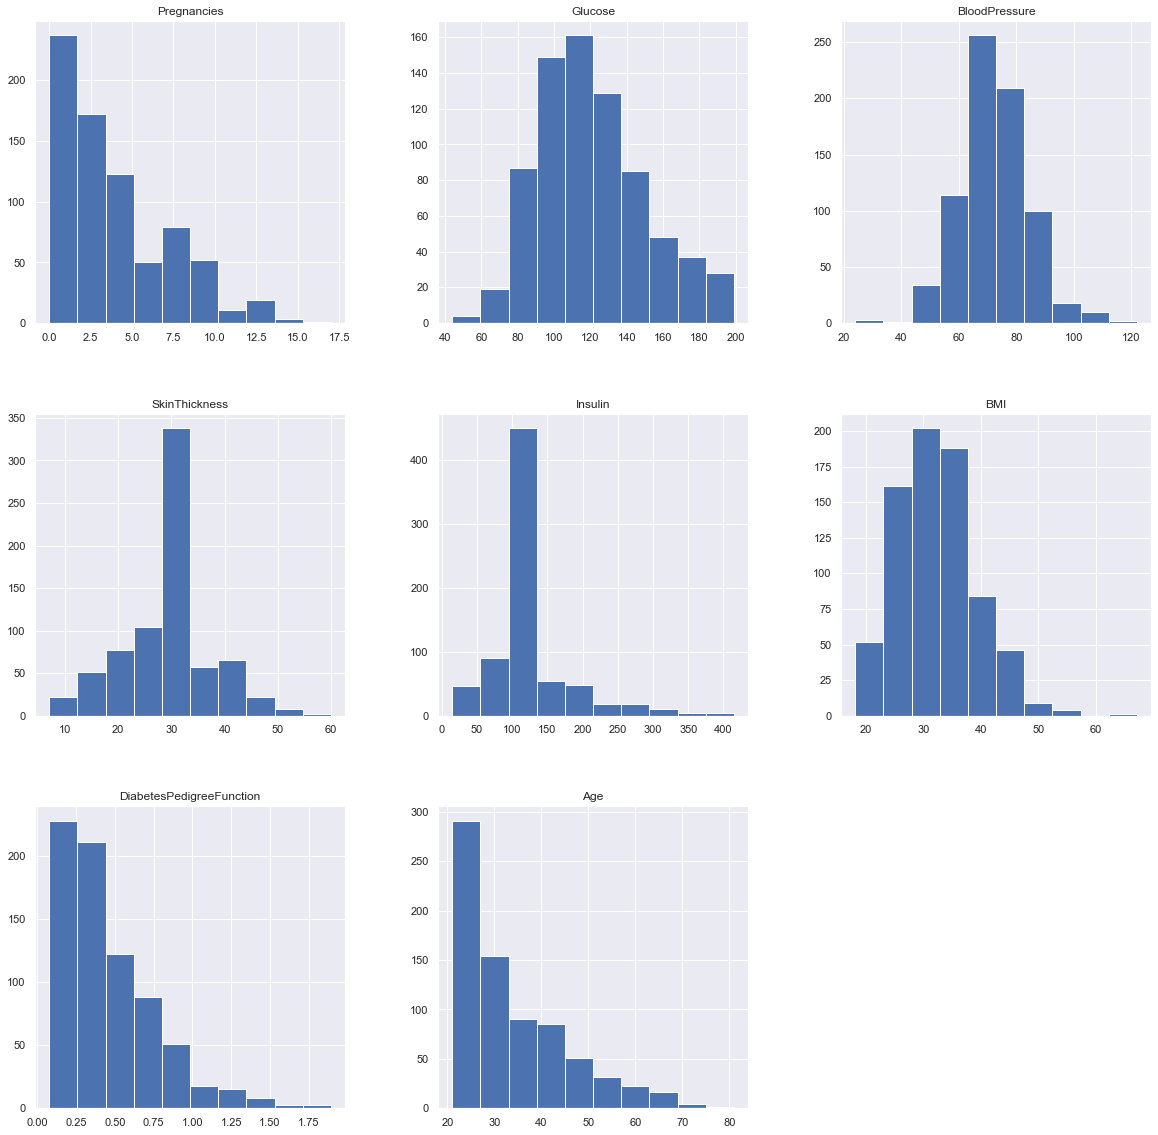

In [30]:
diabetes_data_copy.hist(figsize = (20,20))

In [31]:
Q1 = diabetes_data_copy.quantile(0.25)
Q3 = diabetes_data_copy.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                  5.00
Glucose                     39.00
BloodPressure               16.00
SkinThickness                7.00
Insulin                      5.00
BMI                          8.95
DiabetesPedigreeFunction     0.37
Age                         16.50
dtype: float64


In [32]:
diabetes_data_copy.skew()

Pregnancies                 0.896722
Glucose                     0.560811
BloodPressure               0.160466
SkinThickness               0.169433
Insulin                     1.740425
BMI                         0.569108
DiabetesPedigreeFunction    1.454918
Age                         1.140771
dtype: float64

In [33]:
diabetes_data_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,3.875502,120.423606,72.419252,28.803213,130.990629,32.293307,0.462150,33.182062
std,3.380162,29.701152,12.077689,8.273968,57.190722,6.792172,0.305768,11.689300
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,25.000000,120.000000,27.400000,0.243500,24.000000
50%,3.000000,116.000000,72.405184,29.000000,125.000000,32.300000,0.368000,29.000000
75%,6.000000,138.000000,80.000000,32.000000,125.000000,36.350000,0.613500,40.500000
max,17.000000,199.000000,122.000000,60.000000,415.000000,67.100000,1.893000,81.000000


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 48.1 KB


In [35]:
df_outcome.shape

(768,)

In [36]:
df_outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Dropping Constant features

In [37]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(df)

VarianceThreshold(threshold=0)

In [38]:
var_thres.get_support()


array([ True,  True,  True,  True,  True,  True,  True,  True])

In [39]:
df.columns[var_thres.get_support()]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [40]:
### It is always a good practice to split train and test data to avoid
#overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,df_outcome,test_size=0.3,random_state=0)

In [41]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.0012176 , 0.1163608 , 0.        , 0.        , 0.00447903,
       0.07274021, 0.        , 0.05033858])

In [42]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Glucose                     0.116361
BMI                         0.072740
Age                         0.050339
Insulin                     0.004479
Pregnancies                 0.001218
BloodPressure               0.000000
SkinThickness               0.000000
DiabetesPedigreeFunction    0.000000
dtype: float64

<AxesSubplot:>

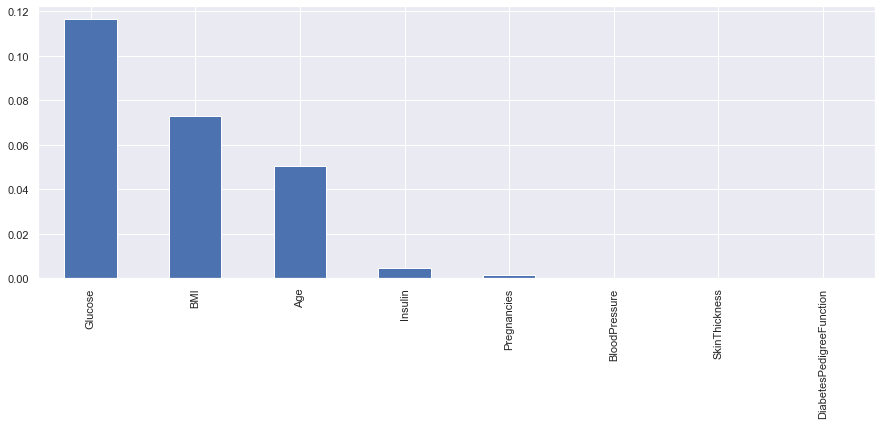

In [43]:

mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [133]:
from sklearn.feature_selection import SelectPercentile
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=50)
selected_top_columns.fit(X_train, y_train)

SelectPercentile(percentile=50,
                 score_func=<function mutual_info_regression at 0x00000136F89008B0>)

In [134]:
X_train.columns[selected_top_columns.get_support()]

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [135]:
df_outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [136]:
df[['Glucose', 'Insulin', 'BMI', 'Age']]

,Glucose,Insulin,BMI,Age
0,148.0,125.0,33.6,50
1,85.0,125.0,26.6,31
2,183.0,125.0,23.3,32
3,89.0,94.0,28.1,21
4,137.0,168.0,43.1,33
...,...,...,...,...
763,101.0,180.0,32.9,63
764,122.0,125.0,36.8,27
765,121.0,112.0,26.2,30
766,126.0,125.0,30.1,47


In [137]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Glucose', 'Insulin', 'BMI', 'Age']])
scaled_data

array([[ 0.86510807, -0.18154124,  0.16661938,  1.4259954 ],
       [-1.20616153, -0.18154124, -0.85219976, -0.19067191],
       [ 2.0158134 , -0.18154124, -1.33250021, -0.10558415],
       ...,
       [-0.0225789 , -0.33213179, -0.910418  , -0.27575966],
       [ 0.14180757, -0.18154124, -0.34279019,  1.17073215],
       [-0.94314317, -0.18154124, -0.29912651, -0.87137393]])

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(scaled_data,i) for i in range(scaled_data.shape[1])]
vif['features']=['Glucose', 'Insulin', 'BMI', 'Age']
vif

,vif,features
0,1.336075,Glucose
1,1.224140,Insulin
2,1.067393,BMI
3,1.078248,Age


In [140]:
df_final=df[['Glucose', 'BloodPressure', 'Insulin', 'BMI']]
df_final.head()

KeyError: "['BloodPressure'] not in index"

In [288]:
### It is always a good practice to split train and test data to avoid
#overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['Glucose', 'Insulin', 'BMI', 'Age']],df_outcome,test_size=0.3,random_state=0)

# Logistic Regression

In [289]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [290]:
model.fit(X_train,y_train)

LogisticRegression()

In [291]:
model.score(X_train,y_train)

0.7783985102420856

In [292]:
model.score(X_test,y_test)

0.7575757575757576

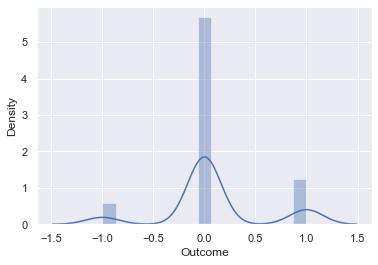

In [293]:
y_pred=model.predict(X_test)
sns.distplot(y_test-y_pred)
plt.show()

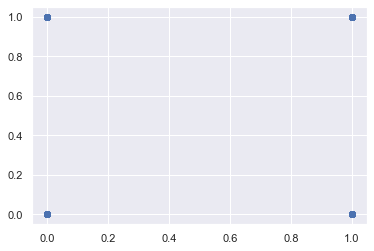

In [294]:
plt.scatter(y_test,y_pred)

## Evaluation score before hyper tuning 

In [295]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [296]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(metrics.roc_auc_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       157
           1       0.67      0.49      0.56        74

    accuracy                           0.76       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.75      0.76      0.75       231

0.685918402478912
0.5625
0.6666666666666666
0.7575757575757576


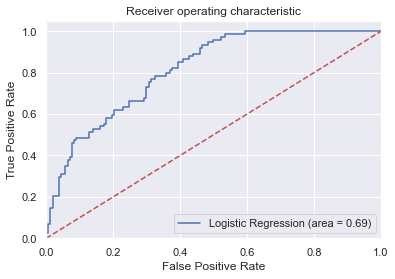

In [297]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Select Best Parameter Selection

In [298]:

C = np.logspace(-4, 4, 50)

penalty = ['l1', 'l2']

solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

multi_class=['auto', 'ovr', 'multinomial']

r_grid = {'penalty': penalty,

               'C': C,

               'solver': solver,

               'multi_class': multi_class}

#print(r_grid)

## Cross validation

In [299]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [300]:
from sklearn.model_selection import GridSearchCV

#grid=GridSearchCV(model,param_grid=r_grid,cv=cv,scoring='accuracy',error_score=0)
grid=GridSearchCV(model,param_grid=r_grid,cv=cv)
grid.fit(X_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.9306...
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [301]:
grid.best_params_

{'C': 0.009102981779915217,
 'multi_class': 'multinomial',
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [302]:
model=LogisticRegression(C=0.08685113737513521,multi_class='auto',solver='liblinear',penalty='l1')
model.fit(X_train,y_train)

LogisticRegression(C=0.08685113737513521, penalty='l1', solver='liblinear')

In [303]:
model.score(X_train,y_train)

0.7579143389199255

In [304]:
model.score(X_test,y_test)

0.7445887445887446

## cross validation different approach

In [305]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [306]:
model.get_params()

{'C': 0.08685113737513521,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [307]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [308]:
scores = cross_val_score(model, X_train, y_train,  cv=cv, n_jobs=-1)

In [309]:
print(np.mean(scores))
print(np.std(scores))

0.7541928721174005
0.04672415453711035


## metrics

 ## Evaluation Metrics 
            Confusion Matrix
            F1 Score
            Gain and Lift Charts
            Kolmogorov Smirnov Chart
            AUC – ROC
            Log Loss
            Gini Coefficient
            Concordant – Discordant Ratio
            Root Mean Squared Error
            Cross Validation (Not a metric though!)

## confusion Mtrics

In [310]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[139  18]
 [ 38  36]]


In [311]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(metrics.roc_auc_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       157
           1       0.67      0.49      0.56        74

    accuracy                           0.76       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.75      0.76      0.75       231

0.685918402478912
0.5625
0.6666666666666666


In [312]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.7575757575757576


## ROC curve

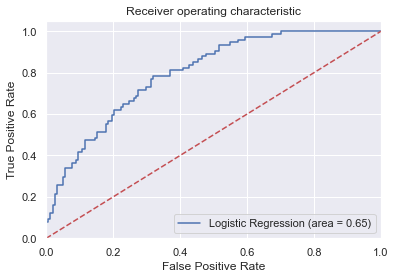

In [313]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [314]:
metrics.roc_auc_score(y_test,y_pred)

0.685918402478912

# Decision Tree

In [315]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [316]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [317]:
model.score(X_train,y_train)

1.0

In [318]:
model.score(X_test,y_test)

0.6883116883116883

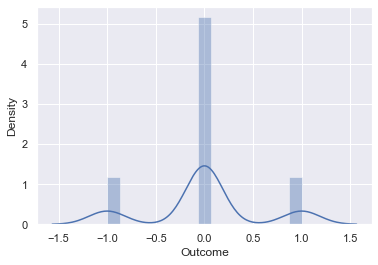

In [319]:
y_pred=model.predict(X_test)
sns.distplot(y_test-y_pred)
plt.show()

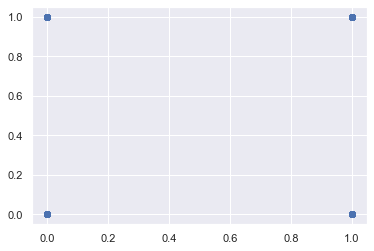

In [320]:
plt.scatter(y_test,y_pred)

In [321]:

''' r_grid={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90],
           "criterion" : ['gini', 'entropy']} '''

r_grid={"max_depth" : [1,3,5,7,9,11,12],
        "criterion" : ['gini', 'entropy']}

In [322]:
model.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [323]:
from sklearn.model_selection import GridSearchCV

#grid=GridSearchCV(model,param_grid=r_grid,cv=cv,scoring='accuracy',error_score=0)
grid=GridSearchCV(model,param_grid=r_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]})

In [324]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [325]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=7)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [326]:
model.score(X_train,y_train)

0.8584729981378026

In [327]:
model.score(X_test,y_test)

0.7835497835497836

# Random Forest

In [328]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [329]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [330]:
model.score(X_train,y_train)

1.0

In [331]:
model.score(X_test,y_test)

0.7662337662337663

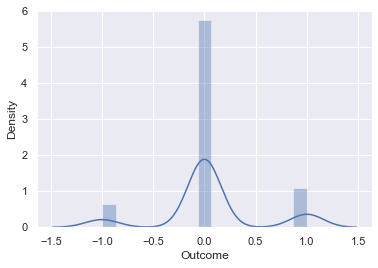

In [332]:
y_pred=model.predict(X_test)
sns.distplot(y_test-y_pred)
plt.show()

# XGBoost

In [333]:
from xgboost import XGBClassifier
model=XGBClassifier()

In [334]:
model.fit(X_train,y_train)

[15:48:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [335]:
model.score(X_train,y_train)

1.0

In [336]:
model.score(X_test,y_test)

0.7532467532467533

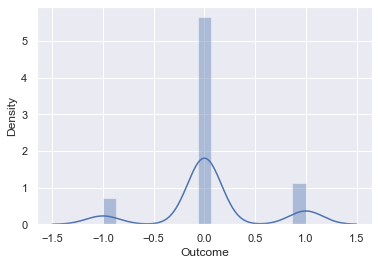

In [337]:
y_pred=model.predict(X_test)
sns.distplot(y_test-y_pred)
plt.show()

# KNN

In [338]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [339]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [340]:
model.score(X_train,y_train)

0.8119180633147114

In [341]:
model.score(X_test,y_test)

0.7359307359307359

In [342]:
model.predict(X_train)

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,

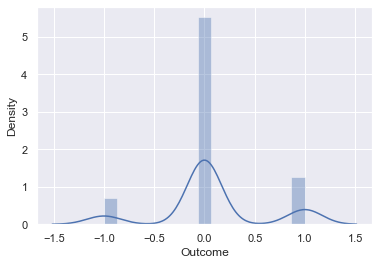

In [343]:
y_pred=model.predict(X_test)
sns.distplot(y_test-y_pred)
plt.show()

In [344]:
import pickle

with open ('knn.sav','wb') as f:
    pickle.dump(model,f)

In [345]:
filename = 'knn_model.pkl'
pickle.dump(model, open(filename, 'wb'))

# SVC

In [346]:
from sklearn.svm import SVC
model=SVC()

In [347]:
model.fit(X_train,y_train)

SVC()

In [348]:
model.score(X_train,y_train)

0.7690875232774674

In [349]:
model.score(X_test,y_test)

0.7489177489177489

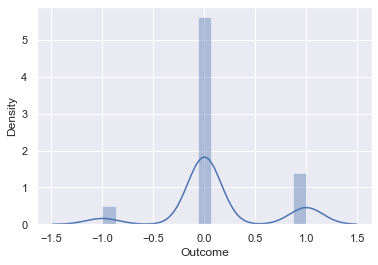

In [350]:
y_pred=model.predict(X_test)
sns.distplot(y_test-y_pred)
plt.show()

# Naive bayes

In [351]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [352]:
model.fit(X_train,y_train)

GaussianNB()

In [353]:
model.score(X_train,y_train)

0.7728119180633147

In [354]:
model.score(X_test,y_test)

0.7575757575757576

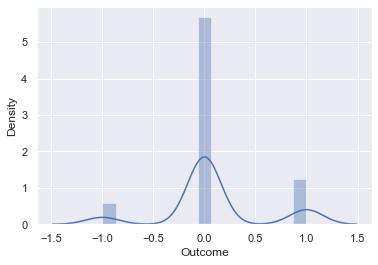

In [355]:
y_pred=model.predict(X_test)
sns.distplot(y_test-y_pred)
plt.show()